In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

In [160]:
# Reading dataset file
df = pd.read_excel("real_data_app_enumah.xlsx")
# Saving a copy of original file


In [333]:
data = df.copy(deep=True)
# Printing top 5 rows
data.head()

,state,facilityID,vl_Count,status_at,current_Age,age_Group,sex,art_Start_Date,status_at_18_months,Total_Visits,...,height,current_Regimen_Line,pregnancy_Status,inh_Start_to_Now,regimen_Switch,vl_Indication,regimen_Line_At_Start,regimen_At_Start,patientLga,bmi
0,Delta,195.0,0.0,Active,25.0,25 - 29,M,2020-07-01 00:00:00,Active,1,...,178.0,Adult 1st line ARV regimen,NaN,300.0,Refill,Initial,Adult 1st line ARV regimen,TDF-3TC-DTG,zGkO37K5oGlUm+1MpGswOw==,overweight
1,Delta,195.0,20548.0,Active,31.0,30 - 34,F,2020-07-01 00:00:00,Active,1,...,180.0,Adult 1st line ARV regimen,NaN,300.0,Refill,Initial,Adult 1st line ARV regimen,TDF-3TC-DTG,zGkO37K5oGlUm+1MpGswOw==,healthy
2,Delta,195.0,40.0,Active,36.0,35 - 39,F,2020-07-01 00:00:00,Active,1,...,185.0,Adult 1st line ARV regimen,NaN,300.0,Refill,Initial,Adult 1st line ARV regimen,TDF-3TC-DTG,evsQliC9pvsbXMH4LEecEA==,healthy
3,Delta,195.0,0.0,Active,21.0,20 - 24,M,2020-07-02 00:00:00,Active,1,...,185.0,Adult 1st line ARV regimen,NaN,300.0,Refill,Initial,Adult 1st line ARV regimen,TDF-3TC-DTG,+uRRED1bmmjG78m2IgRA1g==,healthy
4,Delta,195.0,0.0,Active,41.0,40 - 44,M,2020-07-02 00:00:00,Active,1,...,185.0,Adult 1st line ARV regimen,NaN,300.0,Refill,Initial,Adult 1st line ARV regimen,TDF-3TC-DTG,+uRRED1bmmjG78m2IgRA1g==,healthy


In [334]:
# Checking columns for missing values
data.isna().sum()

state                                   651
facilityID                              481
vl_Count                             514822
status_at                            465753
current_Age                            7598
age_Group                              7598
sex                                     627
art_Start_Date                       472598
status_at_18_months                  464552
Total_Visits                              0
patientID                               642
drug_Duration                        465447
regimen_Dispensed                    465537
number_of_Days_Missed_Appointment    465753
last_Drug_Pickup_Date                465363
biometric                                 0
age_At_Art_Start                     472661
facilityLgaID                           495
defaultID                               760
careEntryPoint                       284274
who_Stage                            434025
weight                               439919
height                          

In [335]:
data["careEntryPoint"] = data["careEntryPoint"].replace("Outreach-program","Outreach")
data["careEntryPoint"] = data["careEntryPoint"].replace("COMMUNITY TESTING","COMMUNITY")
data["careEntryPoint"] = data["careEntryPoint"].replace("community","COMMUNITY")
data["careEntryPoint"] = data["careEntryPoint"].replace("COMMUNITY TESTERS","COMMUNITY")
data["careEntryPoint"] = data["careEntryPoint"].replace("COMMUNITY TESTER","COMMUNITY")
data["careEntryPoint"] = data["careEntryPoint"].replace("Community-ART","COMMUNITY")
data["careEntryPoint"] = data["careEntryPoint"].replace("Community","COMMUNITY")
data["careEntryPoint"] = data["careEntryPoint"].replace("ct","COMMUNITY")
data["careEntryPoint"] = data["careEntryPoint"].replace("CB","CBO")
data["careEntryPoint"] = data["careEntryPoint"].replace("cbo","CBO")
data["careEntryPoint"] = data["careEntryPoint"].replace("CB O","CBO")
data["careEntryPoint"] = data["careEntryPoint"].replace("cb","CBO")
data["careEntryPoint"] = data["careEntryPoint"].replace("CBO TESTING","CBO")
data["careEntryPoint"] = data["careEntryPoint"].replace("CBO KWALE","CBO")
data["careEntryPoint"] = data["careEntryPoint"].replace("CB0","CBO")
data["careEntryPoint"] = data["careEntryPoint"].replace("COB","CBO")
data["careEntryPoint"] = data["careEntryPoint"].replace("SPOKE","SPOKE SITE")
data["careEntryPoint"] = data["careEntryPoint"].replace("SPOKES","SPOKE SITE")
data["careEntryPoint"] = data["careEntryPoint"].replace("SPOKE TESTING","SPOKE SITE")
data["careEntryPoint"] = data["careEntryPoint"].replace("SPOKE INDEX","SPOKE SITE")
data["careEntryPoint"] = data["careEntryPoint"].replace("ANC/PMTCT","ANC")

data["careEntryPoint"].value_counts().nlargest(11)

OPD           99654
Outreach      82023
CBO           50393
VCT           30232
ANC            2863
COMMUNITY      2420
CT             2187
Other          1106
L&D             818
TB              541
SPOKE SITE      480
Name: careEntryPoint, dtype: int64

In [336]:


# pd.read_excel("real_data_app_enumah.xlsx")

In [337]:
# Remove unnecessary columns such as IDs, dates etc
data = data.drop(['defaultID', 'patientID', 'facilityID', 'art_Start_Date', 'patientLga',
                 'last_Drug_Pickup_Date', 'facilityLgaID', 'number_of_Days_Missed_Appointment', "status_at", "current_Age","weight","height"], axis = 1)

In [338]:
# Checking data type of each column to see if there is any mismatch
data.dtypes

state                     object
vl_Count                 float64
age_Group                 object
sex                       object
status_at_18_months       object
Total_Visits               int64
drug_Duration            float64
regimen_Dispensed         object
biometric                   bool
age_At_Art_Start         float64
careEntryPoint            object
who_Stage                float64
current_Regimen_Line      object
pregnancy_Status          object
inh_Start_to_Now         float64
regimen_Switch            object
vl_Indication             object
regimen_Line_At_Start     object
regimen_At_Start          object
bmi                       object
dtype: object

In [339]:
# Iterate over each column in the DataFrame
for column in data.columns:
    # Check if the column is of categorical data type
    if data[column].dtype == 'object':
        # Print the column name
        print(f"Column: {column}")
        # Print the unique values in the column
        print(data[column].unique())
        print()

Column: state
['Delta' 'Imo' 'Enugu' nan]

Column: age_Group
['25 - 29' '30 - 34' '35 - 39' '20 - 24' '40 - 44' '15 - 19' '45 - 49'
 '>=50' datetime.datetime(2023, 1, 4, 0, 0)
 datetime.datetime(2023, 10, 14, 0, 0) datetime.datetime(2023, 5, 9, 0, 0)
 '<1' nan]

Column: sex
['M' 'F' nan]

Column: status_at_18_months
['Active' 'LTFU' 'Missed Appointment' 'Returned to care' 'Restarted'
 'Transferred out' 'Death' nan 'Discontinued Care']

Column: regimen_Dispensed
['TDF-3TC-DTG' 'TDF-FTC-DTG' 'TDF-3TC-AZT' 'TDF-FTC-NVP' nan
 'TDF-3TC-ATV/r' 'AZT-3TC-NVP' 'TDF-3TC-EFV' 'AZT-3TC-DTG' 'ABC-3TC-NVP'
 'AZT-3TC-ATV/r' 'D4T-3TC-NVP' 'ABC-3TC-ATV/r' 'ABC-3TC-EFV' 'TDF-3TC-NVP'
 'ABC-3TC-LPV/r' 'ABC-3TC-DTG' 'D4T-3TC-EFV' 'AZT-3TC-EFV' 'TDF-3TC-LPV/r'
 'TDF-FTC-EFV' 'AZT-3TC-LPV/r' 'Dolutegravir' 'ABC-3TC-DTG-ATV/r'
 'AZT-TDF-3TC-LPV/r' 'ABC-3TC-AZT' 'DDI-3TC-EFV' 'ABC-FTC-DTG'
 'Single dose Nevirapine' 'TDF-FTC-LPV/r' 'D4T-3TC-LPV/r' 'ABC-DDI-LPV/r']

Column: careEntryPoint
['Outreach' 'STI' nan 

In [340]:
# Cleaning the categorical columns
data['status_at_18_months'] = data['status_at_18_months'].replace('Inactive', 'InActive')
data['regimen_At_Start'] = data['regimen_At_Start'].str.replace('/r', '')
data['current_Regimen_Line'] = data['current_Regimen_Line'].str.replace('/r', '')
data['regimen_Dispensed'] = data['regimen_Dispensed'].str.replace('/r', '')

In [341]:
# Removing Invalid age groups from the data
valid_age_groups = ['25 - 29', '30 - 34', '35 - 39', '20 - 24', '40 - 44', '15 - 19', '45 - 49','>=50', 'nan']
data = data[data['age_Group'].isin(valid_age_groups)]

In [342]:
# Remove Invalid Entry Point
valid_cep = ["OPD","Outreach", "CBO","VCT","COMMUNITY","ANC","Other","L&D","TB","SPOKE SITE","PMTCT"]
data = data[data['careEntryPoint'].isin(valid_cep)]

In [343]:
# Checking distribution of total visits column
data['Total_Visits'].value_counts()

1    130208
3     90919
2     39193
Name: Total_Visits, dtype: int64

In [344]:
# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(exclude=np.number).columns

# Impute missing values in numeric columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
imputed_numeric = numeric_imputer.fit_transform(data[numeric_cols])

# Impute missing values in categorical columns with most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical = categorical_imputer.fit_transform(data[categorical_cols])

In [345]:
# Create a DataFrame with imputed numeric columns
imputed_df_num = pd.DataFrame(imputed_numeric, columns=numeric_cols)

# Create a DataFrame with imputed categorical columns
imputed_df_cat = pd.DataFrame(imputed_categorical, columns=categorical_cols)

# Concatenate imputed numeric columns with categorical columns
data_imputed = pd.concat([imputed_df_num, imputed_df_cat], axis=1)

data_imputed.head()

,vl_Count,Total_Visits,drug_Duration,age_At_Art_Start,who_Stage,inh_Start_to_Now,state,age_Group,sex,status_at_18_months,regimen_Dispensed,biometric,careEntryPoint,current_Regimen_Line,pregnancy_Status,regimen_Switch,vl_Indication,regimen_Line_At_Start,regimen_At_Start,bmi
0,0.0,1.0,180.0,23.0,1.0,300.0,Delta,25 - 29,M,Active,TDF-3TC-DTG,True,Outreach,Adult 1st line ARV regimen,Not Pregnant,Refill,Initial,Adult 1st line ARV regimen,TDF-3TC-DTG,overweight
1,20548.0,1.0,180.0,29.0,1.0,300.0,Delta,30 - 34,F,Active,TDF-3TC-DTG,True,Outreach,Adult 1st line ARV regimen,Not Pregnant,Refill,Initial,Adult 1st line ARV regimen,TDF-3TC-DTG,healthy
2,40.0,1.0,180.0,35.0,1.0,300.0,Delta,35 - 39,F,Active,TDF-3TC-DTG,True,Outreach,Adult 1st line ARV regimen,Not Pregnant,Refill,Initial,Adult 1st line ARV regimen,TDF-3TC-DTG,healthy
3,0.0,1.0,180.0,20.0,1.0,300.0,Delta,20 - 24,M,Active,TDF-3TC-DTG,True,Outreach,Adult 1st line ARV regimen,Not Pregnant,Refill,Initial,Adult 1st line ARV regimen,TDF-3TC-DTG,healthy
4,0.0,1.0,180.0,40.0,1.0,300.0,Delta,40 - 44,M,Active,TDF-3TC-DTG,True,Outreach,Adult 1st line ARV regimen,Not Pregnant,Refill,Initial,Adult 1st line ARV regimen,TDF-3TC-DTG,healthy


In [346]:
# Check frequency distribution of current status column
data_imputed['status_at_18_months'].value_counts()

Active                250631
Missed Appointment      5951
LTFU                    2526
Restarted                863
Death                    135
Transferred out          127
Discontinued Care         70
Returned to care          17
Name: status_at_18_months, dtype: int64

In [347]:
# Converting current status to two possible categories that are active and inactive
data_imputed['status_at_18_months'] = data_imputed['status_at_18_months'].replace('Missed Appointment', 'Active')
data_imputed['status_at_18_months'] = data_imputed['status_at_18_months'].replace('Restarted', 'Active')
data_imputed['status_at_18_months'] = data_imputed['status_at_18_months'].replace('Active', 'Active')
data_imputed['status_at_18_months'] = data_imputed['status_at_18_months'].replace('Returned to care', 'Active')
data_imputed['status_at_18_months'] = data_imputed['status_at_18_months'].replace('Death', 'InActive')
data_imputed['status_at_18_months'] = data_imputed['status_at_18_months'].replace('Discontinued Care', 'InActive')
data_imputed['status_at_18_months'] = data_imputed['status_at_18_months'].replace('Transferred out', 'InActive')
data_imputed['status_at_18_months'] = data_imputed['status_at_18_months'].replace('LTFU', 'InActive')
# Check frequency distribution of current status column
data_imputed['status_at_18_months'].value_counts()

Active      257462
InActive      2858
Name: status_at_18_months, dtype: int64

In [348]:
data_imputed["bmi"].value_counts()
# data_imputed["age_At_Art_Start"].value_counts()
# data_imputed["careEntryPoint"].value_counts()
# data_imputed["state"].value_counts()
# data_imputed["vl_Count"].value_counts()
# data_imputed["age_Group"].value_counts()
# data_imputed["who_Stage"].value_counts()
# data_imputed["biometric"].value_counts()

healthy           135494
underweight       116006
overweight          7117
obesity             1500
severe obesity       203
Name: bmi, dtype: int64

In [349]:
# Calculate z-scores for each numerical column
z_scores = data_imputed.select_dtypes(include=np.number).apply(lambda x: np.abs((x - x.mean()) / x.std()))

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Remove rows with outliers in numerical columns
df_no_outliers = data_imputed[(z_scores < threshold).all(axis=1)]

# Check final shape of data
df_no_outliers.shape

(237236, 20)

In [350]:
df_no_outliers["bmi"].value_counts()

healthy           120783
underweight       112814
overweight          2936
obesity              636
severe obesity        67
Name: bmi, dtype: int64

In [351]:
# Copy out data for the second model
df_model_2 = df_no_outliers.copy(deep=True)
df_no_outliers.to_csv("Final_Cleaned_Data.csv")
# X_current_Status = df_no_outliers[['current_Status']]
X_status_at_18_months = df_no_outliers[['status_at_18_months']]
df_no_outliers = df_no_outliers.drop(['status_at_18_months', 'Total_Visits'], axis = 1)

In [352]:
# Label encoding all numeric columns
# Iterate over each column in the DataFrame
for column in df_no_outliers.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_no_outliers[column] = le.fit_transform(df_no_outliers[column].astype(str))

In [353]:
df_no_outliers.columns

Index(['vl_Count', 'drug_Duration', 'age_At_Art_Start', 'who_Stage',
       'inh_Start_to_Now', 'state', 'age_Group', 'sex', 'regimen_Dispensed',
       'biometric', 'careEntryPoint', 'current_Regimen_Line',
       'pregnancy_Status', 'regimen_Switch', 'vl_Indication',
       'regimen_Line_At_Start', 'regimen_At_Start', 'bmi'],
      dtype='object')

In [354]:
df_no_outliers.to_csv("Model1_Cleaned_Data.csv")

## Machine Learning Algorithms

### Status at 18th Month in Treatment Prediction

In [355]:
ltfu_data = df_no_outliers.drop(["regimen_Line_At_Start", "regimen_At_Start", "regimen_Switch","drug_Duration", "inh_Start_to_Now", "regimen_Dispensed", "current_Regimen_Line"], axis=1)

In [356]:
y = ltfu_data

In [357]:
#SPlit the dataset into training and testing sets, with a ratio of 70% and 30% respectively.
X_train, X_test, y_train, y_test = train_test_split(y, X_status_at_18_months, test_size=0.3)

In [358]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [359]:
# Set the random seed for NumPy
np.random.seed(42)

# Initializing a random forest classifier and parameters with random values to find the best one
rfc = RandomForestClassifier(random_state = 42)

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}

In [360]:
# Performing 5 fold cross validation to find best set of parameters using grid seacr cv
np.random.seed(124)
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [361]:
best_param = {'max_depth': 16, 'n_estimators': 250}
# Display CV results
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
    return results.best_params_
best_param = display(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 250}


0.993 + or -0.0 for the {'max_depth': 2, 'n_estimators': 5}
0.993 + or -0.0 for the {'max_depth': 2, 'n_estimators': 10}
0.993 + or -0.0 for the {'max_depth': 2, 'n_estimators': 50}
0.993 + or -0.0 for the {'max_depth': 2, 'n_estimators': 100}
0.993 + or -0.0 for the {'max_depth': 2, 'n_estimators': 250}
0.993 + or -0.0 for the {'max_depth': 4, 'n_estimators': 5}
0.994 + or -0.0 for the {'max_depth': 4, 'n_estimators': 10}
0.994 + or -0.0 for the {'max_depth': 4, 'n_estimators': 50}
0.994 + or -0.0 for the {'max_depth': 4, 'n_estimators': 100}
0.994 + or -0.0 for the {'max_depth': 4, 'n_estimators': 250}
0.994 + or -0.0 for the {'max_depth': 8, 'n_estimators': 5}
0.994 + or -0.0 for the {'max_depth': 8, 'n_estimators': 10}
0.994 + or -0.0 for the {'max_depth': 8, 'n_estimators': 50}
0.994 + or -0.0 for the {'max_depth': 8, 'n_estimators': 100}
0.994 + or -0.0 for the {'max_depth': 8, 'n_estimators': 250}
0.995 + or -0.0 for 

In [362]:
#Import Random Forest Classifier and fit the model.
random.seed(1)
clf = RandomForestClassifier(max_depth = best_param['max_depth'], n_estimators = best_param['n_estimators'])
clf.fit(X_train,y_train)

/var/folders/0d/fd1ff_1s1m774k18f9wq04880000gn/T/ipykernel_56589/575316264.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=16, n_estimators=250)

In [363]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9948293546528783


In [364]:
#Printing classification report
print(confusion_matrix(y_test, y_pred))

[[70647    50]
 [  318   156]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


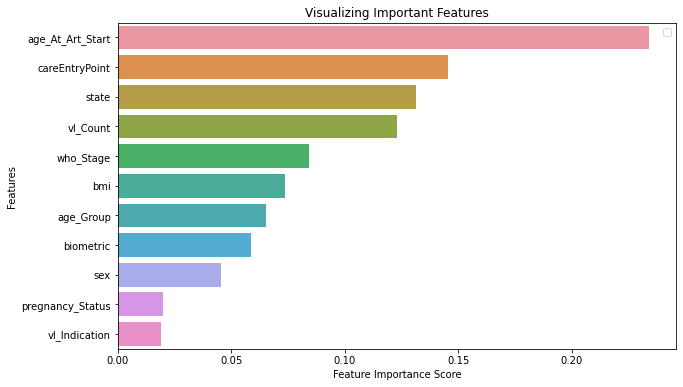

In [365]:
# Show features with their importance value. The higer the value the more important the variable is in estimation of our target
# variable.
feature_imp = pd.Series(clf.feature_importances_, index = ltfu_data.columns).sort_values(ascending=False)

#Creating a bar plot for features importance.
# Set the figure size
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [366]:
import joblib
joblib.dump(clf, 'random_forest_model_status_at_18th_month.pkl')

['random_forest_model_status_at_18th_month.pkl']

### Predicting Patient Interruption point

In [367]:

useable_df_model_2 = df_model_2[df_model_2["status_at_18_months"] == "InActive"]
X_Total_Visits = useable_df_model_2[['Total_Visits']]
useable_df_model_2 = useable_df_model_2.drop(['status_at_18_months', 'Total_Visits'], axis = 1)

# Label encoding all numeric columns
# Iterate over each column in the DataFrame
for column in useable_df_model_2.select_dtypes(include='object').columns:
    le = LabelEncoder()
    useable_df_model_2[column] = le.fit_transform(useable_df_model_2[column].astype(str))

useable_df_model_2.columns

useable_df_model_2.to_csv("Model2_Cleaned_Data.csv")


In [368]:
#SPlit the dataset into training and testing sets, with a ratio of 70% and 30% respectively.
X_train, X_test, y_train, y_test = train_test_split(useable_df_model_2, X_Total_Visits, test_size=0.3)


In [369]:
useable_df_model_2.head()

,vl_Count,drug_Duration,age_At_Art_Start,who_Stage,inh_Start_to_Now,state,age_Group,sex,regimen_Dispensed,biometric,careEntryPoint,current_Regimen_Line,pregnancy_Status,regimen_Switch,vl_Indication,regimen_Line_At_Start,regimen_At_Start,bmi
6,53.0,90.0,26.0,1.0,294.0,0,2,1,3,1,6,2,1,1,0,0,3,0
7,0.0,90.0,21.0,1.0,294.0,0,1,1,3,1,6,2,1,1,0,0,3,0
18,47.0,90.0,24.0,1.0,297.0,0,2,1,3,1,6,2,1,1,3,0,3,0
51,40.0,90.0,22.0,1.0,300.0,0,1,1,3,1,6,2,1,1,0,0,3,0
79,40.0,90.0,24.0,1.0,299.0,0,2,1,3,1,6,2,1,1,0,0,3,0


In [370]:
# Performing 5 fold cross validation to find best set of parameters using grid seacr cv
np.random.seed(124)
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())
best_param = display(cv)

Best parameters are: {'max_depth': 2, 'n_estimators': 250}


0.484 + or -0.007 for the {'max_depth': 2, 'n_estimators': 5}
0.488 + or -0.002 for the {'max_depth': 2, 'n_estimators': 10}
0.488 + or -0.003 for the {'max_depth': 2, 'n_estimators': 50}
0.488 + or -0.004 for the {'max_depth': 2, 'n_estimators': 100}
0.489 + or -0.003 for the {'max_depth': 2, 'n_estimators': 250}
0.482 + or -0.015 for the {'max_depth': 4, 'n_estimators': 5}
0.48 + or -0.013 for the {'max_depth': 4, 'n_estimators': 10}
0.487 + or -0.007 for the {'max_depth': 4, 'n_estimators': 50}
0.486 + or -0.011 for the {'max_depth': 4, 'n_estimators': 100}
0.483 + or -0.013 for the {'max_depth': 4, 'n_estimators': 250}
0.454 + or -0.015 for the {'max_depth': 8, 'n_estimators': 5}
0.456 + or -0.017 for the {'max_depth': 8, 'n_estimators': 10}
0.47 + or -0.013 for the {'max_depth': 8, 'n_estimators': 50}
0.471 + or -0.01 for the {'max_depth': 8, 'n_estimators': 100}
0.475 + or -0.016 for the {'max_depth': 8, 'n_estimators':

In [371]:

print(f"Best Param Variable: {best_param}")
print(best_param['max_depth'])
print(best_param['n_estimators'])

Best Param Variable: {'max_depth': 2, 'n_estimators': 250}
2
250


In [372]:
#Import Random Forest Classifier and fit the model.
random.seed(1)
clf2 = RandomForestClassifier(max_depth = best_param['max_depth'], n_estimators = best_param['n_estimators'])
clf2.fit(X_train,y_train)

/var/folders/0d/fd1ff_1s1m774k18f9wq04880000gn/T/ipykernel_56589/2741823010.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X_train,y_train)


RandomForestClassifier(max_depth=2, n_estimators=250)

In [373]:
y_pred = clf2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4790794979079498


In [374]:
print(clf2.predict(useable_df_model_2[:1]))

[1.]


In [375]:
#Printing classification report
print(confusion_matrix(y_test, y_pred))

[[229   0   0]
 [ 58   0   0]
 [191   0   0]]


In [376]:
#Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.48      1.00      0.65       229
         2.0       0.00      0.00      0.00        58
         3.0       0.00      0.00      0.00       191

    accuracy                           0.48       478
   macro avg       0.16      0.33      0.22       478
weighted avg       0.23      0.48      0.31       478



/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


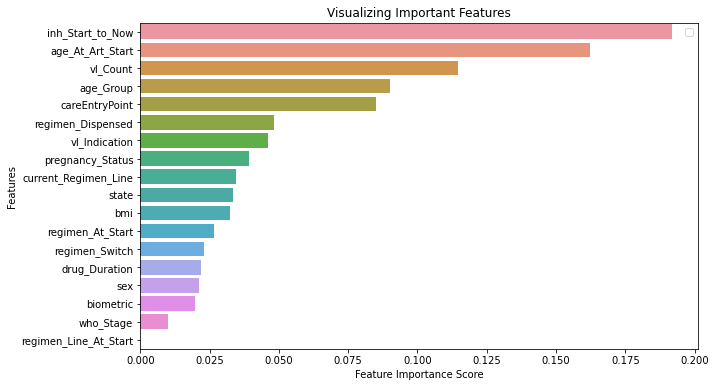

In [377]:
# Show features with their importance value. The higer the value the more important the variable is in estimation of our target
# variable.
feature_imp = pd.Series(clf2.feature_importances_, index = df_no_outliers.columns).sort_values(ascending=False)

#Creating a bar plot for features importance.
# Set the figure size
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [378]:
joblib.dump(clf2, 'random_forest_model_number_of_visit_before_interruption.pkl')

['random_forest_model_number_of_visit_before_interruption.pkl']

In [379]:
# Predict Status_at_18th_Month
def predict_status(data):   
    clf = joblib.load("random_forest_model_status_at_18th_month.pkl")
    return clf.predict(data)

In [380]:
# Predict Number of Visit Before Defaulting
def predict_number_of_visits(data):
    clf = joblib.load("random_forest_model_number_of_visit_before_interruption.pkl")
    return clf.predict(data)